In [1]:
import os
import numpy
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
def read_site_csv(csv_filename):
    csv_data = numpy.genfromtxt(csv_filename, delimiter=',', dtype=str)
    csv_v = csv_data[:, 1]
    csv_v[csv_v=='']='nan'
    csv_v = csv_v.astype(float)
    return csv_data[:, 0], csv_v

In [7]:
def mean_curve_30min(site_name, time_list, site_obs_le, site_cal_et, min_et=-10, max_et=650, save_flag=0):
    # 30-min
    formatted_dates = []
    for date_string in time_list:
        dt_object = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ")
        formatted_date = dt_object.strftime("%-d")
        formatted_dates.append(formatted_date)

    plt.figure(figsize=(20, 4))
    plt.plot(numpy.linspace(0, len(site_obs_le), len(site_obs_le)), site_obs_le, '-', color='black', label='EC-site observed LE')
    plt.plot(numpy.linspace(0, len(site_cal_et), len(site_cal_et)), site_cal_et, '-', color='red', label='PT-JPL estimated ET')
    xtick_intervals = 24*2
    plt.xticks(numpy.linspace(0, len(formatted_dates), int(len(formatted_dates)/xtick_intervals)), formatted_dates[::xtick_intervals], rotation=45, ha='right')
    plt.ylabel(r'$W/m^2$', fontsize=14)
    plt.xlim(0,len(time_list))
    plt.ylim((min_et,max_et))
    title_str = site_name + ' ' + (time_list[0] + ' - ' + time_list[-1]).replace('T',' ').replace('Z','')
    plt.title(title_str)
    plt.legend()
    if save_flag:
        plt.savefig(os.path.join(OUTPUT_FOLDER, site_name+'_month_30min_'+ title_str + '.png'), dpi=300)
    else:
        plt.show()
        plt.clf()

In [4]:
OUTPUT_FOLDER = '/disk2/workspace/20240327'
SITE_LE_FOLDER = '/disk2/workspace/20240326/site_LE_obs'

## Sites

In [5]:
site_infos = [# site, lat, lon, UTC+
    ["CLC", 44.59666667, 123.4702778, 8]
]

CLC


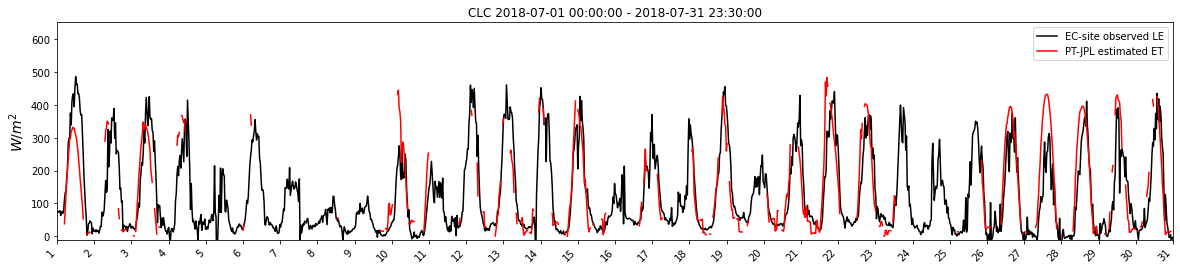

<Figure size 432x288 with 0 Axes>

In [8]:
# July
site_name = site_infos[0][0]
print(site_name)
site_output_csv = os.path.join(OUTPUT_FOLDER, site_name + '_PL-JPL_outputs_testNDVI.csv')
datMMS = pd.read_csv(site_output_csv)

site_timelist = numpy.array(datMMS.Time)
site_et_list = numpy.array(datMMS.evapotranspiration).astype(float)

site_obs_le_csv = os.path.join(SITE_LE_FOLDER, site_name + '_2018_2019_LE.csv')
site_obs_timelist, site_obs_le_30min = read_site_csv(site_obs_le_csv)
# mean ET every 30 min
site_obs_30 = numpy.copy(site_obs_le_30min)
site_cal_30 = numpy.mean(site_et_list.reshape(-1, 3), axis=1)
month_start_end = ['2018-07-01T00:00:00Z','2018-07-31T23:59:59Z']
time_list_month = []
site_obs_month = []
site_cal_month = []
month_start_date = datetime.strptime(month_start_end[0], "%Y-%m-%dT%H:%M:%SZ")
month_end_date = datetime.strptime(month_start_end[1], "%Y-%m-%dT%H:%M:%SZ")
for obs_idx in range(len(site_obs_timelist)):
    obs_time = site_obs_timelist[obs_idx]
    obs_time_date = datetime.strptime(obs_time, "%Y-%m-%dT%H:%M:%SZ")
    if obs_time_date >= month_start_date and obs_time_date < month_end_date:
        time_list_month.append(obs_time)
        site_obs_month.append(site_obs_30[obs_idx])
        site_cal_month.append(site_cal_30[obs_idx])
mean_curve_30min(site_name, time_list_month, site_obs_month, site_cal_month, min_et=-10, max_et=650, save_flag=0)